In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [23]:
import os

img_dir = r'/Users/thx.tnc/Desktop/dogs-vs-cats-redux-kernels-edition/train'
images = os.listdir(img_dir)
images[:3]

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg']

In [24]:
full_images = [os.path.join(img_dir, img) for img in images]

In [25]:
full_images[:3]

['/Users/thx.tnc/Desktop/dogs-vs-cats-redux-kernels-edition/train/dog.8011.jpg',
 '/Users/thx.tnc/Desktop/dogs-vs-cats-redux-kernels-edition/train/cat.5077.jpg',
 '/Users/thx.tnc/Desktop/dogs-vs-cats-redux-kernels-edition/train/dog.7322.jpg']

### Loading images

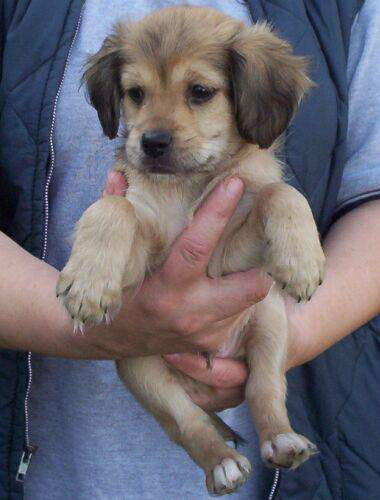

In [26]:
load_img(full_images[0])

In [27]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


### Data Preprocessing 

In [28]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build the Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# then i compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the Model

In [30]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 5s 18ms/step - loss: 0.6826 - accuracy: 0.5567 - val_loss: 0.6407 - val_accuracy: 0.6340
Epoch 2/10
250/250 [==============================] - 4s 18ms/step - loss: 0.6241 - accuracy: 0.6507 - val_loss: 0.5861 - val_accuracy: 0.7050
Epoch 3/10
250/250 [==============================] - 5s 18ms/step - loss: 0.5488 - accuracy: 0.7181 - val_loss: 0.5296 - val_accuracy: 0.7365
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.4896 - accuracy: 0.7619 - val_loss: 0.5125 - val_accuracy: 0.7655
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.4367 - accuracy: 0.7975 - val_loss: 0.4676 - val_accuracy: 0.7860
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 0.3902 - accuracy: 0.8192 - val_loss: 0.4672 - val_accuracy: 0.7870
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 0.3423 - accuracy: 0.8486 - val_loss: 0.4452 - val_accuracy: 0.7990

### Visualiza Traing and Validation Loass 

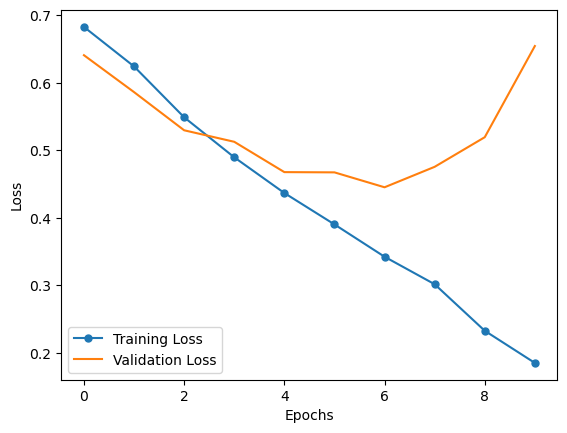

In [31]:
plt.plot(history.history['loss'], 'o-', label='Training Loss', markersize=5)
plt.plot(history.history['val_loss'], '-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Evalute Model on testing set

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

63/63 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.7590
Test Accuracy: 75.90%
Test Loss: 0.6543


### Visualiza Correct and Invorrect Prediction 

63/63 [==============================] - 0s 5ms/step


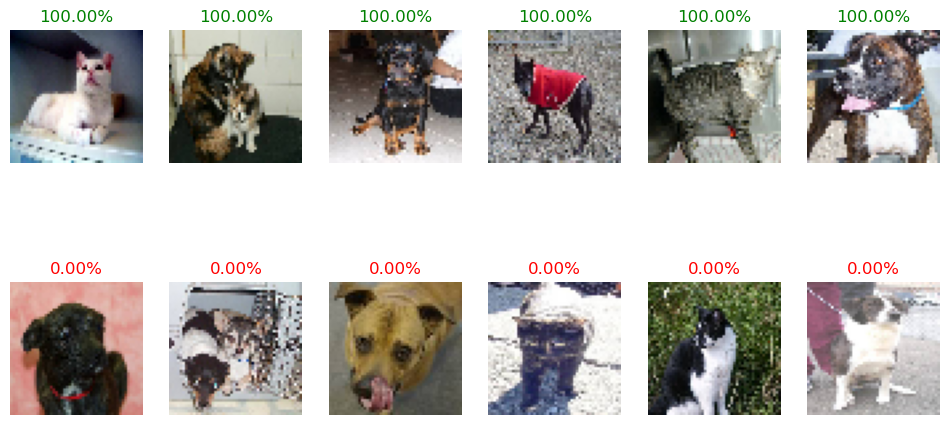

In [39]:
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int).flatten()

correctly_labeled_indices = np.where(predicted_labels == y_test)[0]
random_correct_indices = np.random.choice(correctly_labeled_indices, 6, replace=False)

incorrectly_labeled_indices = np.where(predicted_labels != y_test)[0]
random_incorrect_indices = np.random.choice(incorrectly_labeled_indices, 6, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(np.concatenate([random_correct_indices, random_incorrect_indices])):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_test[idx])

    actual_label = y_test[idx]
    predicted_label = predicted_labels[idx]

    accuracy_percentage = (predicted_label == actual_label) * 100

    title_color = 'green' if actual_label == predicted_label else 'red'
    
    plt.title(f'{accuracy_percentage:.2f}%', color=title_color)
    plt.axis('off')

plt.show()


### Test the Model with the images

1/1 [==============================] - 0s 9ms/step


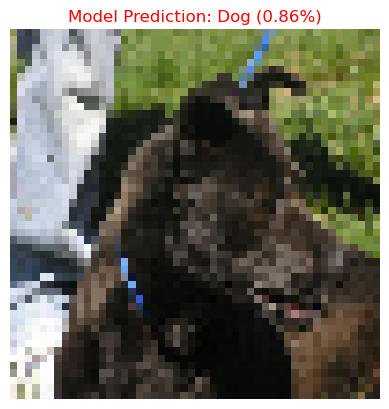

In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

new_image_path = '/Users/thx.tnc/Documents/dogs-vs-cats-redux-kernels-edition/train/dog.9027.jpg' 

new_image = load_img(new_image_path, target_size=(50, 50))
new_image_array = img_to_array(new_image)
new_image_array = new_image_array.reshape((1,) + new_image_array.shape) / 255.0

prediction = model.predict(new_image_array)[0, 0]
predicted_label = "Cat" if prediction < 0.5 else "Dog"

plt.imshow(new_image)
plt.title(f'Model Prediction: {predicted_label} ({prediction:.2f}%)', color='green' if predicted_label == "Cat" else 'red')
plt.axis('off')
plt.show()


In [ ]:
### I try by best below is save model 

In [43]:
model.save('Thananon_Chounudom_47573_MODEL.h5')